<a href="https://colab.research.google.com/github/FlorianWoelki/titanic_classification/blob/master/titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the dataset

Click this [link](https://www.kaggle.com/c/titanic/overview) to go to the kaggle titanic dataset.

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic
!ls

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
 gender_submission.csv	 kaggle.json   test.csv
'kaggle (1).json'	 sample_data   train.csv


## Check the data

> The following table explains the data.

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket Class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the titanic |                                                |
| parch    | # of parents / children aboard the titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


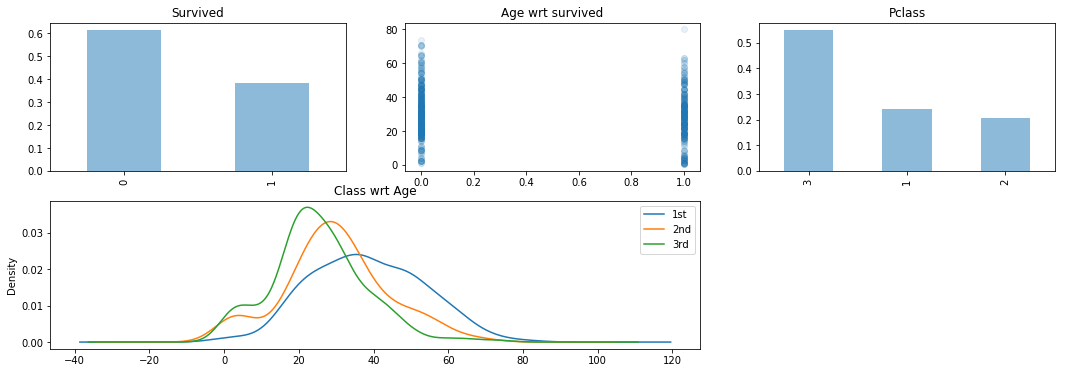

In [6]:
fig = plt.figure(figsize=(18, 6))

plt.subplot2grid((2, 3), (0, 0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((2, 3), (0, 1))
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title('Age wrt survived')

plt.subplot2grid((2, 3), (0, 2))
df.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Pclass')

plt.subplot2grid((2, 3), (1, 0), colspan=2)
for x in [1, 2, 3]:
  df.Age[df.Pclass == x].plot(kind='kde')
plt.title('Class wrt Age')
plt.legend(('1st', '2nd', '3rd'))

plt.show()

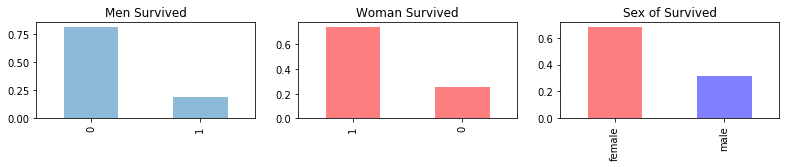

In [7]:
fig = plt.figure(figsize=(18, 6))

female_color = '#FA0000'

plt.subplot2grid((3, 4), (0, 0))
df.Survived[df.Sex == 'male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Men Survived')

plt.subplot2grid((3, 4), (0, 1))
df.Survived[df.Sex == 'female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Woman Survived')

plt.subplot2grid((3, 4), (0, 2))
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=[female_color, 'b'])
plt.title('Sex of Survived')

plt.show()

## Normalize the data

In [0]:
def normalize_data(data):
  data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
  data['Age'] = data['Age'].fillna(data['Age'].dropna().median())
  
  data.loc[data['Sex'] == 'male', 'Sex'] = 0
  data.loc[data['Sex'] == 'female', 'Sex'] = 1
  
  data['Embarked'] = data['Embarked'].fillna('S')
  data.loc[data['Embarked'] == 'S', 'Embarked'] = 0
  data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
  data.loc[data['Embarked'] == 'Q', 'Embarked'] = 2

In [0]:
train = df
normalize_data(train)

## Building and training the model

In [0]:
import tensorflow as tf

In [0]:
BATCH_SIZE = 32
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(7,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
labels = train['Survived'].values
feature_names = ['Pclass', 'Age', 'Fare', 'Embarked', 'Sex', 'SibSp', 'Parch']
features = train[feature_names].values

In [134]:
history = model.fit(features, labels, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2, shuffle=True)

Train on 712 samples, validate on 179 samples
Epoch 1/50
712/712 [==============================] - 0s 486us/sample - loss: 0.8794 - acc: 0.6124 - val_loss: 0.6309 - val_acc: 0.6816
Epoch 2/50
712/712 [==============================] - 0s 131us/sample - loss: 0.7276 - acc: 0.6587 - val_loss: 0.5642 - val_acc: 0.7318
Epoch 3/50
712/712 [==============================] - 0s 137us/sample - loss: 0.6690 - acc: 0.6489 - val_loss: 0.5377 - val_acc: 0.7263
Epoch 4/50
712/712 [==============================] - 0s 132us/sample - loss: 0.6560 - acc: 0.6671 - val_loss: 0.5163 - val_acc: 0.7486
Epoch 5/50
712/712 [==============================] - 0s 130us/sample - loss: 0.6415 - acc: 0.6742 - val_loss: 0.5472 - val_acc: 0.6983
Epoch 6/50
712/712 [==============================] - 0s 129us/sample - loss: 0.6144 - acc: 0.6770 - val_loss: 0.4951 - val_acc: 0.7486
Epoch 7/50
712/712 [==============================] - 0s 139us/sample - loss: 0.6165 - acc: 0.7079 - val_loss: 0.5516 - val_acc: 0.6872
Ep

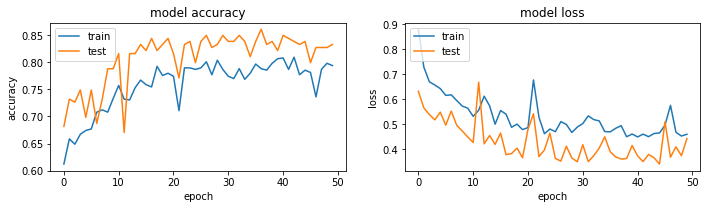

In [135]:
fig = plt.figure(figsize=(18, 6))

plt.subplot2grid((2, 3), (0, 0))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot2grid((2, 3), (0, 1))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [0]:
test_data = pd.read_csv('train.csv')
normalize_data(test_data)
test_data = test_data[feature_names]
predictions = model.predict(test_data[feature_names], batch_size=BATCH_SIZE)

## Visualize predicted data

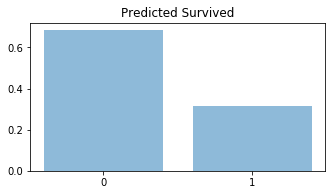

In [107]:
import numpy as np

fig = plt.figure(figsize=(18, 6))

predictions = np.around(predictions)
pred_zeros = (predictions == 0).sum()
pred_ones = (predictions == 1).sum()

plt.subplot2grid((2, 3), (0, 1))
plt.title('Predicted Survived')
plt.xticks(np.arange(2), ('0', '1'))
plt.bar([0, 1], [pred_zeros/len(predictions), pred_ones/len(predictions)], alpha=0.5)

plt.show()

In [96]:
print('Predicted Dead people', pred_zeros)
print('Predicted Alive people', pred_ones)

Predicted Dead people 287
Predicted Alive people 131
